In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv(r"C:\Users\KIIT\Desktop\projects\air pollution regression/train.csv")

In [3]:
X=X.values
x=X[:,:5]
print(X)
y=X[:,5]
print(y)

[[  2.93416239e-01  -9.45598713e-01  -4.21105147e-01   4.06816021e-01
    5.25661832e-01  -8.21546666e+01]
 [ -8.36084081e-01  -1.89228039e-01  -7.76402618e-01  -1.05383124e+00
    5.97996852e-01  -4.88979602e+01]
 [  2.36425114e-01   1.32836018e-01  -1.47722982e-01   6.99853963e-01
   -1.87364163e-01   7.72703707e+01]
 ..., 
 [  1.04417694e+00  -8.99206485e-01   1.73039905e+00  -1.87105676e+00
    4.42519647e-01  -1.07510508e+02]
 [ -1.26917290e+00  -5.05215916e-03   1.85766873e+00  -1.08036482e+00
    7.36333937e-01  -4.73415578e+01]
 [ -1.88400025e+00  -8.49427430e-01  -1.45227035e+00   4.88613076e-01
    1.45957580e+00  -1.15939003e+02]]
[ -82.15466656  -48.89796018   77.2703707  ..., -107.51050797  -47.34155781
 -115.93900296]


In [4]:
data=pd.DataFrame(x)

In [5]:
data.head()

,0,1,2,3,4
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [6]:
print(x.shape)
#we can see that there are 1600 rows and 6 features in the training dataset

(1600, 5)


In [7]:
data.describe()

,0,1,2,3,4
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005
std,0.997338,1.021776,1.011768,1.017189,0.978654
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527
75%,0.682118,0.645442,0.639130,0.646290,0.650089
max,3.287205,3.438895,3.216176,2.985410,3.321770


In [8]:
#normalisation
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std
#print(x)

In [9]:
df=pd.DataFrame(x)
print(df.head())

          0         1         2         3         4
0  0.290165 -0.898712 -0.372381  0.441771  0.525024
1 -0.842705 -0.158229 -0.723656 -0.994642  0.598960
2  0.233004  0.157070 -0.102094  0.729947 -0.203782
3  0.171708  0.167210 -0.530576 -0.078377 -1.333037
4 -1.702188  0.558336 -2.723087 -0.633625  1.259339


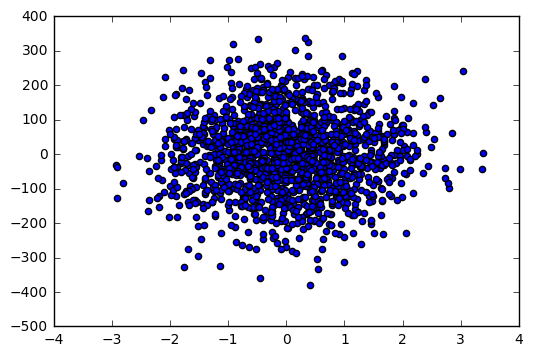

In [10]:
plt.scatter(x[:,4],y)
plt.show()
#we can only plot one feature of x vs  y as there is only one feature present in the y

In [11]:
ones=np.ones((x.shape[0],1))
x=np.hstack((ones,x))
print(x.shape)
#as you can see earlier there were 5 columns in the x matrix but now as we have added the ones column there are 6 columns present

(1600, 6)


In [12]:
def hypothesis(x,theta):
    return np.dot(x,theta)

def error(x,y,theta):
    e = 0.0
    y_ = hypothesis(x,theta)
    e = np.sum((y-y_)**2)
    m=x.shape[0]
    
    return e/m
    
def gradient(x,y,theta):
    
    y_ = hypothesis(x,theta)
    grad = np.dot(x.T,(y_ - y))
    m = x.shape[0]
    return grad/m

def gradient_descent(x,y,learning_rate = 0.1,max_iters=300):
    
    n = x.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(x,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(x,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [13]:
import time
start=time.time()
theta,error_list=gradient_descent(x,y)
end_time=time.time()
print("the time taken between the start and the ed time is",end_time-start)

the time taken between the start and the ed time is 0.025974750518798828


In [14]:
theta

array([  0.31883538,  29.59359198,  94.65067706,   8.37544469,
        45.52303635,   2.46461552])

In [15]:
error_list

[12256.130414032896,
 10026.033684143073,
 8217.0552528176195,
 6749.466627013956,
 5558.6731870892891,
 4592.3340674739929,
 3808.0315657917154,
 3171.3849608951386,
 2654.5237799458382,
 2234.8518383481501,
 1894.04653113265,
 1617.2484830009766,
 1392.4052530232816,
 1209.7397313936942,
 1061.3194764678278,
 940.70777623550748,
 842.68088586426256,
 762.99885867864714,
 698.21978653437759,
 645.54920573334459,
 602.71799423681978,
 567.88335592979956,
 539.5485154072411,
 516.49757853027768,
 497.74268728982702,
 482.48114259194153,
 470.06060992121974,
 459.95088023812474,
 451.72094792963361,
 445.02040210685021,
 439.5643175010901,
 435.12098512481214,
 431.50194759201071,
 428.55390508306681,
 426.15213988278555,
 424.19517385310292,
 422.60042706729115,
 421.30068951394429,
 420.24125320690831,
 419.37758077512552,
 418.67340992065016,
 418.09921205003548,
 417.63093873539134,
 417.24900212055684,
 416.93744550121892,
 416.68326851820393,
 416.475878069587,
 416.30664146076725,

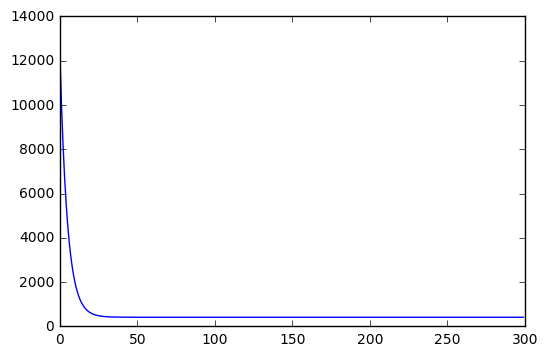

In [16]:
plt.plot(error_list)
plt.show()

In [17]:
x_test=pd.read_csv(r'C:\Users\KIIT\Desktop\projects\air pollution regression/test.csv')


In [27]:
ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))
y_test=hypothesis(x_test,theta)

In [31]:
y_test=hypothesis(x_test,theta)
df=pd.DataFrame(data=y_test,columns=["target"])
df.to_csv("y_predictions.csv",index_label="Id")

In [32]:
#predciting the r_2 score
def r2_score(y,y_):
    #instead of using the loop we can use the np.sum as it is fast and easier
    numerator=np.sum((y-y_)**2)
    denominator=np.sum((y-y_.mean())**2)
    r2_score=1-(numerator/denominator)
    return r2_score

ValueError: operands could not be broadcast together with shapes (1600,) (400,) 